In [1]:
#Import library

# general
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.style as style
import matplotlib.ticker as mtick

# datetime
import datetime as dt
from datetime import date

# standardization
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
#read data 

df = pd.read_csv('marketing_campaign_data.csv')
df.head(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
df.describe().T

count          mean           std        min  \
Unnamed: 0           2240.0  1.119500e+03  6.467766e+02        0.0   
ID                   2240.0  5.592160e+03  3.246662e+03        0.0   
Year_Birth           2240.0  1.968806e+03  1.198407e+01     1893.0   
Income               2216.0  5.224725e+07  2.517308e+07  1730000.0   
Kidhome              2240.0  4.441964e-01  5.383981e-01        0.0   
Teenhome             2240.0  5.062500e-01  5.445382e-01        0.0   
Recency              2240.0  4.910938e+01  2.896245e+01        0.0   
MntCoke              2240.0  3.039357e+05  3.365974e+05        0.0   
MntFruits            2240.0  2.630223e+04  3.977343e+04        0.0   
MntMeatProducts      2240.0  1.669500e+05  2.257154e+05        0.0   
MntFishProducts      2240.0  3.752545e+04  5.462898e+04        0.0   
MntSweetProducts     2240.0  2.706295e+04  4.128050e+04        0.0   
MntGoldProds         2240.0  4.402188e+04  5.216744e+04        0.0   
NumDealsPurchases    2240.0  2.325000e+00  1.932238e+00        0.0   
NumWebPurchases      2240.0  4.084821e+00  2.778714e+00        0.0   
NumCatalogPurchases  2240.0  2.662054e+00  2.923101e+00        0.0   
NumStorePurchases    2240.0  5.790179e+00  3.250958e+00        0.0   
NumWebVisitsMonth    2240.0  5.316518e+00  2.426645e+00        0.0   
AcceptedCmp3         2240.0  7.276786e-02  2.598131e-01        0.0   
AcceptedCmp4         2240.0  7.455357e-02  2.627283e-01        0.0   
AcceptedCmp5         2240.0  7.276786e-02  2.598131e-01        0.0   
AcceptedCmp1         2240.0  6.428571e-02  2.453160e-01        0.0   
AcceptedCmp2         2240.0  1.339286e-02  1.149756e-01        0.0   
Complain             2240.0  9.375000e-03  9.639117e-02        0.0   
Z_CostContact        2240.0  3.000000e+00  0.000000e+00        3.0   
Z_Revenue            2240.0  1.100000e+01  0.000000e+00       11.0   
Response             2240.0  1.491071e-01  3.562736e-01        0.0   

                             25%         50%          75%          max  
Unnamed: 0                559.75      1119.5      1679.25       2239.0  
ID                       2828.25      5458.5      8427.75      11191.0  
Year_Birth               1959.00      1970.0      1977.00       1996.0  
Income               35303000.00  51381500.0  68522000.00  666666000.0  
Kidhome                     0.00         0.0         1.00          2.0  
Teenhome                    0.00         0.0         1.00          2.0  
Recency                    24.00        49.0        74.00         99.0  
MntCoke                 23750.00    173500.0    504250.00    1493000.0  
MntFruits                1000.00      8000.0     33000.00     199000.0  
MntMeatProducts         16000.00     67000.0    232000.00    1725000.0  
MntFishProducts          3000.00     12000.0     50000.00     259000.0  
MntSweetProducts         1000.00      8000.0     33000.00     263000.0  
MntGoldProds             9000.00     24000.0     56000.00     362000.0  
NumDealsPurchases           1.00         2.0         3.00         15.0  
NumWebPurchases             2.00         4.0         6.00         27.0  
NumCatalogPurchases         0.00         2.0         4.00         28.0  
NumStorePurchases           3.00         5.0         8.00         13.0  
NumWebVisitsMonth           3.00         6.0         7.00         20.0  
AcceptedCmp3                0.00         0.0         0.00          1.0  
AcceptedCmp4                0.00         0.0         0.00          1.0  
AcceptedCmp5                0.00         0.0         0.00          1.0  
AcceptedCmp1                0.00         0.0         0.00          1.0  
AcceptedCmp2                0.00         0.0         0.00          1.0  
Complain                    0.00         0.0         0.00          1.0  
Z_CostContact               3.00         3.0         3.00          3.0  
Z_Revenue                  11.00        11.0        11.00         11.0  
Response                    0.00         0.0         0.00          1.0

In [5]:
df.describe(include='O').T

count unique         top  freq
Education       2240      5          S1  1127
Marital_Status  2240      6     Menikah   864
Dt_Customer     2240    663  31-08-2012    12

# Feature Engineering

In [6]:
dfe = df.copy()

In [7]:
# Convertion Rate = jumlah total transaksi / jumlah total visit perbulan (NumVisitsMonth)

# Total Transaksi
dfe['TotalPurchases'] = dfe['NumDealsPurchases']+dfe['NumWebPurchases']+dfe['NumCatalogPurchases']+dfe['NumStorePurchases']

# Convertion Rate (CVR)
def div(x,y):
    if y == 0:
        return 0
    return x / y
dfe['CVR'] = dfe.apply(lambda x: div(x['TotalPurchases'],x['NumWebVisitsMonth']), axis=1)


# umur
dfe['Age'] = 2022 - dfe['Year_Birth']
# grup umur
age_group=[]
for i in dfe['Age']:
    if i >= 0 and i <= 1:
        group = 'Infant'
    elif i >= 2 and i <= 4:
        group = 'Toddler'
    elif i >= 5 and i <= 12:
        group = 'Child'
    elif i >= 13 and i <= 19:
        group = 'Teen'
    elif i >= 20 and i <= 39:
        group = 'Adult'
    elif i >= 40 and i <= 59:
        group = 'Middle Aged'
    else:
        group = 'Senior Citizen'
    age_group.append(group)
        
dfe['AgeGroup'] = age_group

# jumlah anak
dfe['NumChild'] = dfe['Kidhome']+dfe['Teenhome']


# total pengeluaran
dfe['TotalSpent'] = dfe['MntCoke']+dfe['MntFishProducts']+dfe['MntFruits']+dfe['MntMeatProducts']+dfe['MntSweetProducts']+dfe['MntGoldProds']

# total accepted campaign
dfe['TotalAcceptedCmp'] = dfe['AcceptedCmp1']+dfe['AcceptedCmp2']+dfe['AcceptedCmp3']+dfe['AcceptedCmp4']+dfe['AcceptedCmp5']

# total hari sejak join
dfe['Dt_Customer'] = pd.to_datetime(dfe['Dt_Customer'])

dfe['Dt_Now'] = date.today()
dfe['Dt_Now'] = dfe['Dt_Now'].astype('datetime64[ns]')

dfe['CustDayJoined'] = dfe['Dt_Now'] - dfe['Dt_Customer']
dfe['CustDayJoined'] = dfe['CustDayJoined'].dt.days

# drop unused features

dfe.drop(['Unnamed: 0', 'Year_Birth','Dt_Customer','Dt_Now', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

dfe.head(5)

ID Education Marital_Status      Income  Kidhome  Teenhome  Recency  \
0  5524        S1         Lajang  58138000.0        0         0       58   
1  2174        S1         Lajang  46344000.0        1         1       38   
2  4141        S1    Bertunangan  71613000.0        0         0       26   
3  6182        S1    Bertunangan  26646000.0        1         0       26   
4  5324        S3        Menikah  58293000.0        1         0       94   

   MntCoke  MntFruits  MntMeatProducts  ...  Complain  Response  \
0   635000      88000           546000  ...         0         1   
1    11000       1000             6000  ...         0         0   
2   426000      49000           127000  ...         0         0   
3    11000       4000            20000  ...         0         0   
4   173000      43000           118000  ...         0         0   

   TotalPurchases       CVR  Age        AgeGroup  NumChild  TotalSpent  \
0              25  3.571429   65  Senior Citizen         0     1617000   
1               6  1.200000   68  Senior Citizen         2       27000   
2              21  5.250000   57     Middle Aged         0      776000   
3               8  1.333333   38           Adult         1       53000   
4              19  3.800000   41     Middle Aged         1      422000   

   TotalAcceptedCmp  CustDayJoined  
0                 0           3848  
1                 0           3002  
2                 0           3349  
3                 0           2942  
4                 0           3198  

[5 rows x 33 columns]

# Exploratory Data Analysis

In [8]:
dfeda = dfe.copy()

In [9]:
dfeda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'NumChild']] = dfeda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'NumChild']].astype('object')

In [10]:
def cat_num (df):
    for typ,col in zip(df.dtypes.values,df.dtypes.index):
        if typ == "object":
             cat_col.append(col)
        else:
            num_col.append(col);

def cat_count(df):
    cat_columns = df[cat_col]
    for col in cat_columns:
        print(f'value counts dari column {col}')
        print(df[col].value_counts())
        print('---'*10, '\n');

In [11]:
cat_col=[]
num_col=[]

cat_num (dfeda)

In [12]:
cat_col

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'AgeGroup',
 'NumChild']

In [13]:
num_col

['ID',
 'Income',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'TotalPurchases',
 'CVR',
 'Age',
 'TotalSpent',
 'TotalAcceptedCmp',
 'CustDayJoined']

In [14]:
cat_count (dfe)

value counts dari column Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts dari column Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts dari column Kidhome
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
------------------------------ 

value counts dari column Teenhome
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
------------------------------ 

value counts dari column AcceptedCmp3
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts dari column AcceptedCmp4
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts dari column AcceptedCmp5
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
------------------------------ 

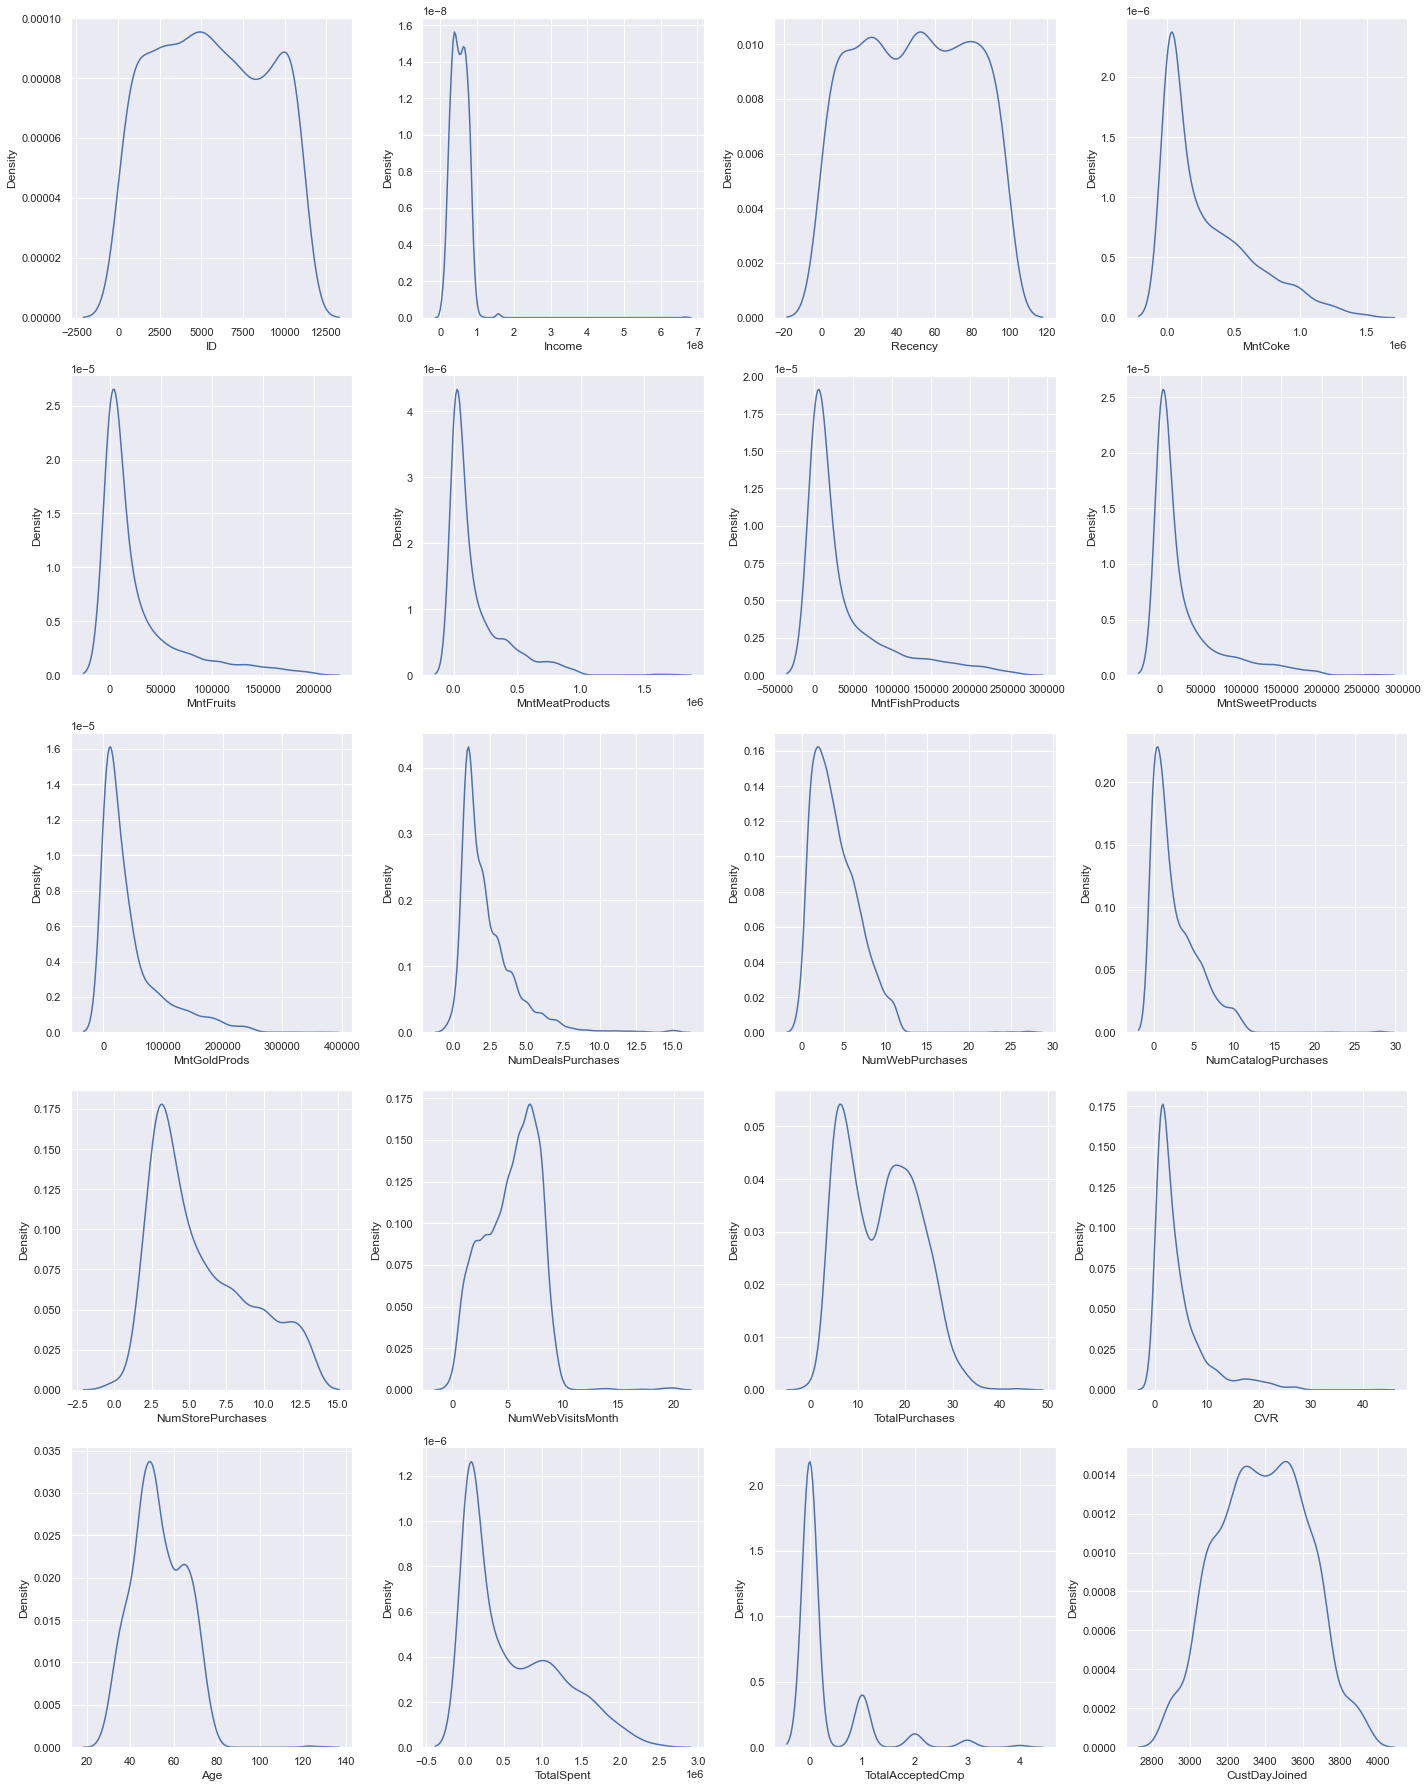

In [15]:
plt.figure(figsize= (20, 25))
for i in range(len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x = dfeda[num_col[i]])
    plt.tight_layout()

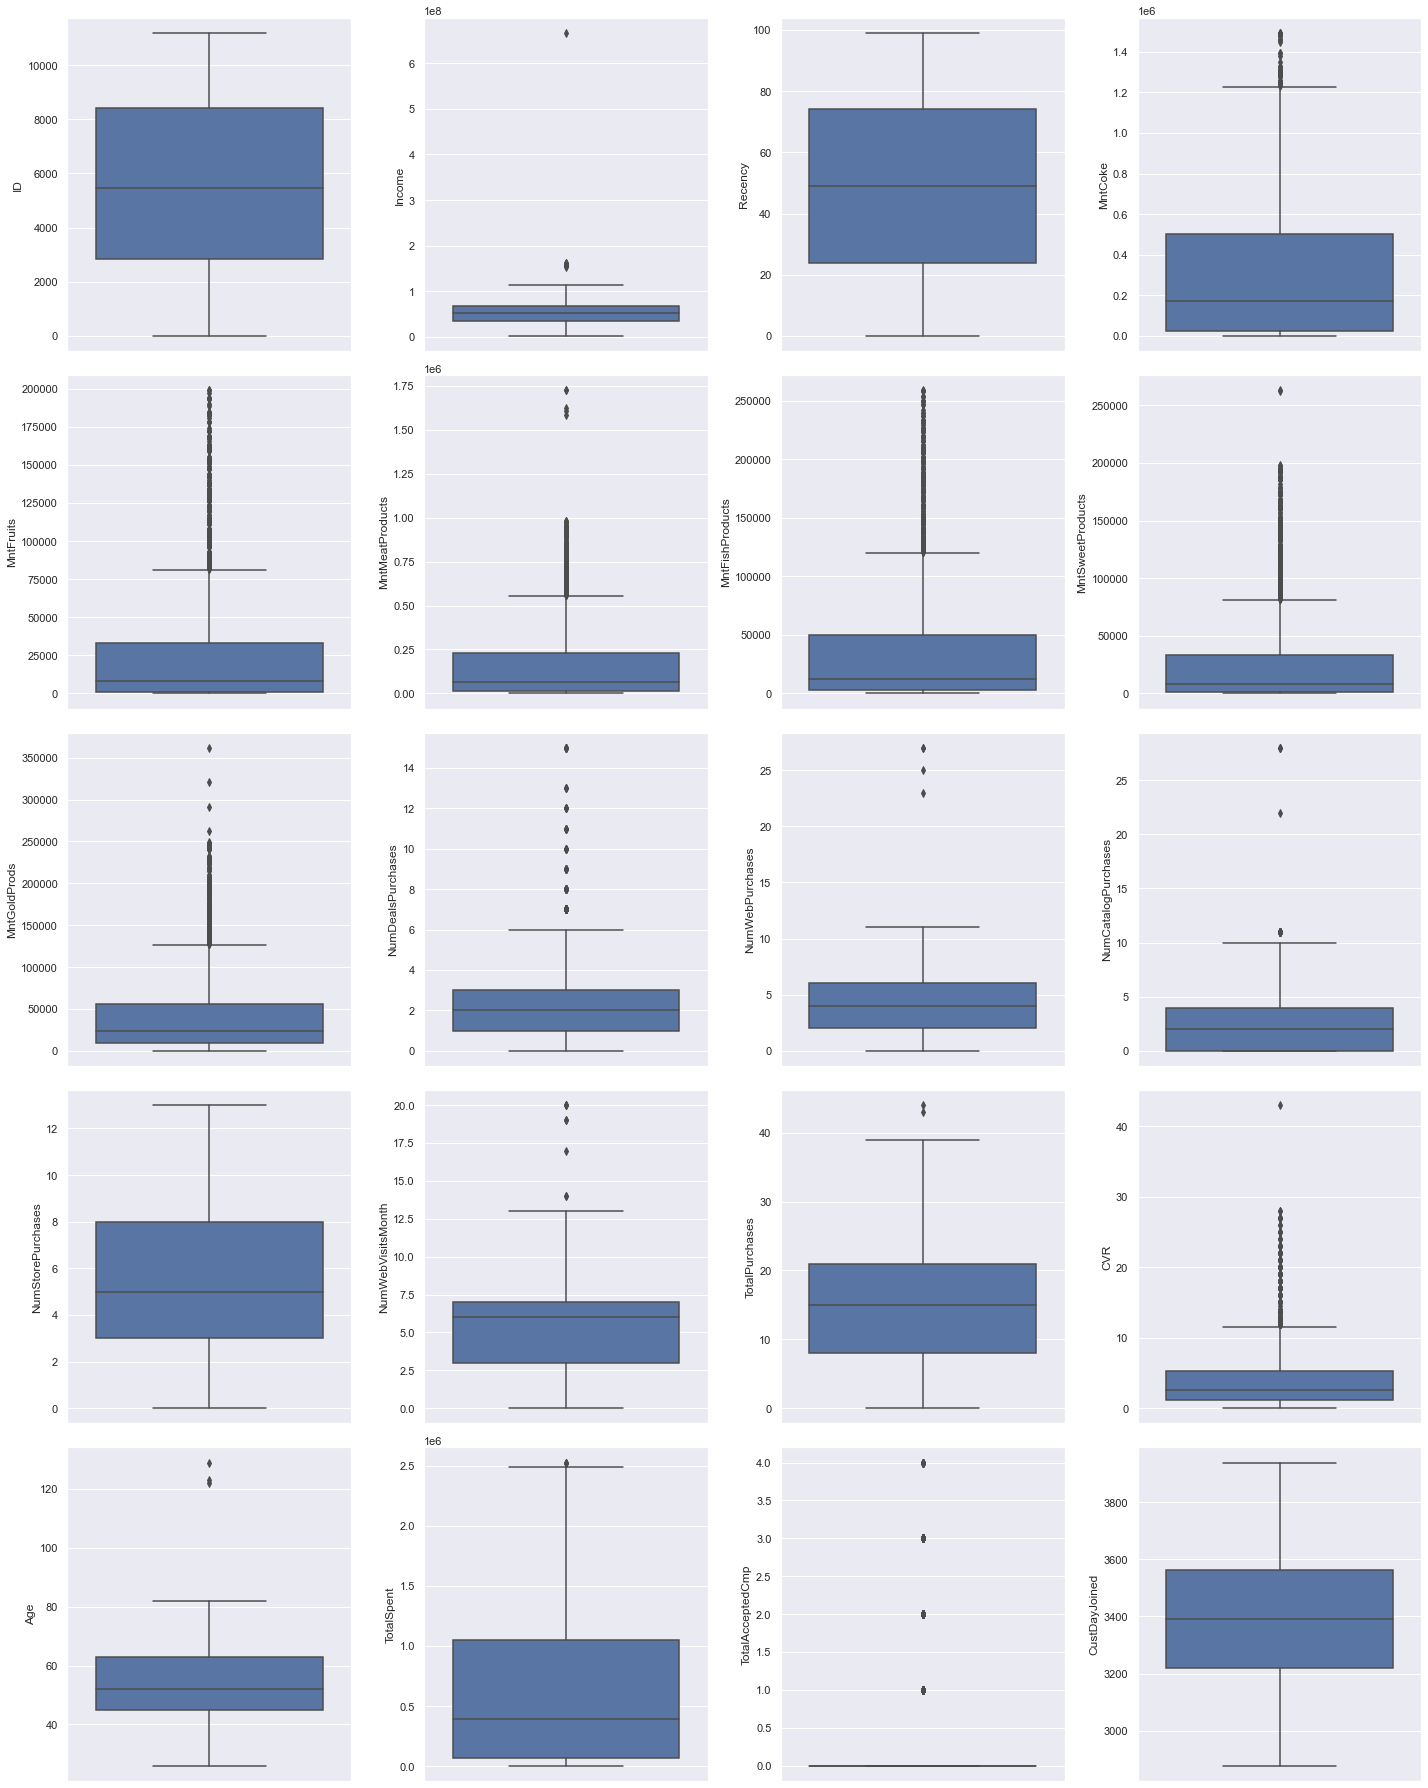

In [16]:
plt.figure(figsize= (20,25))
for i in range(len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y = dfeda[num_col[i]])
    plt.tight_layout()

## Multivariate

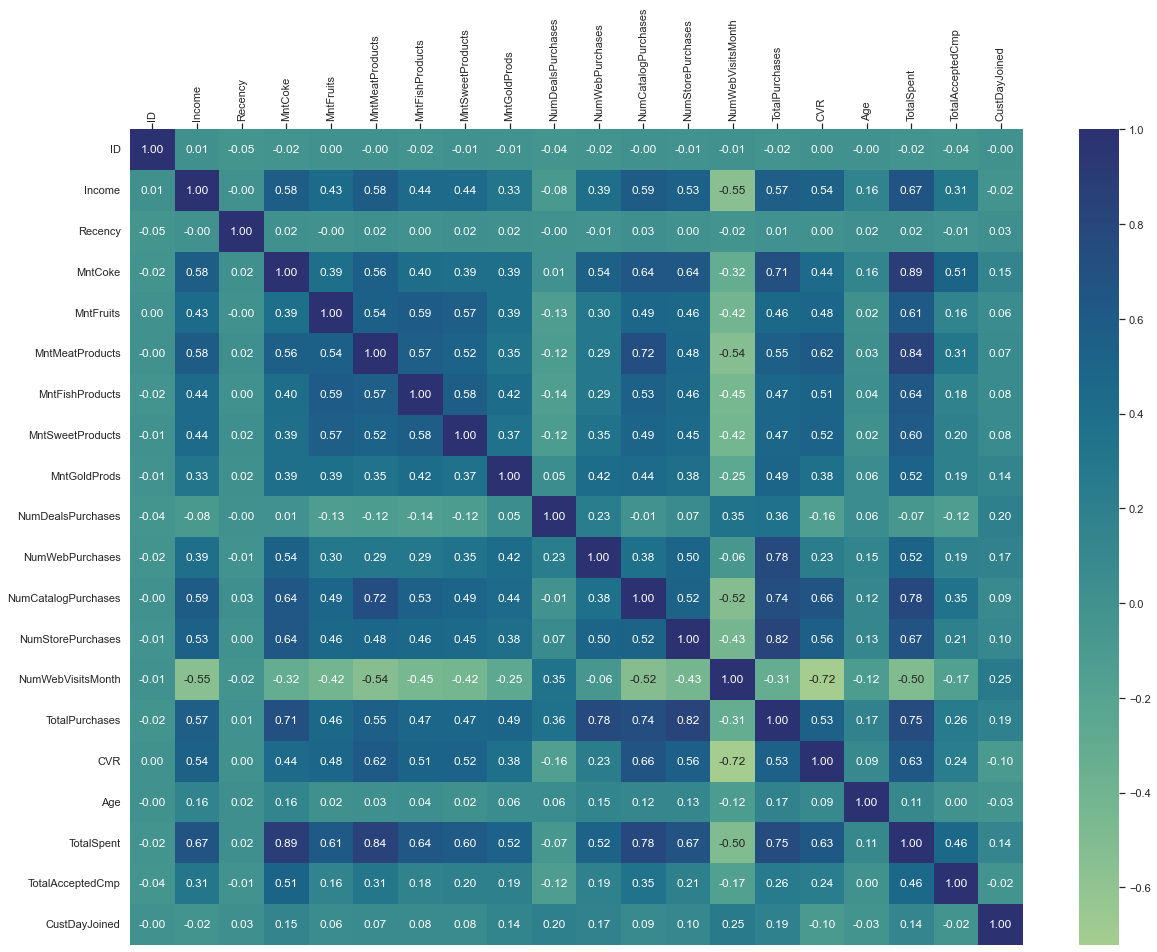

In [17]:
fig = plt.figure(figsize = (20,15))
ax = sns.heatmap(dfeda.corr(), annot=True, cmap ='crest', fmt = '.2f')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.savefig('heatmap_eda.png')
plt.show()


In [18]:
# sns.pairplot(dfeda, diag_kind = 'kde')

## Based on Age Group

In [19]:
df_agecvr = dfeda.groupby('AgeGroup').agg({'CVR':'sum'}).reset_index()
df_agecvr['TotalCVR'] = df_agecvr['CVR'].sum()
df_agecvr['Percentage'] = round((df_agecvr['CVR']/df_agecvr['TotalCVR']),2)
df_agecvr

AgeGroup          CVR     TotalCVR  Percentage
0           Adult  1396.827026  9845.297974        0.14
1     Middle Aged  4731.134441  9845.297974        0.48
2  Senior Citizen  3717.336508  9845.297974        0.38

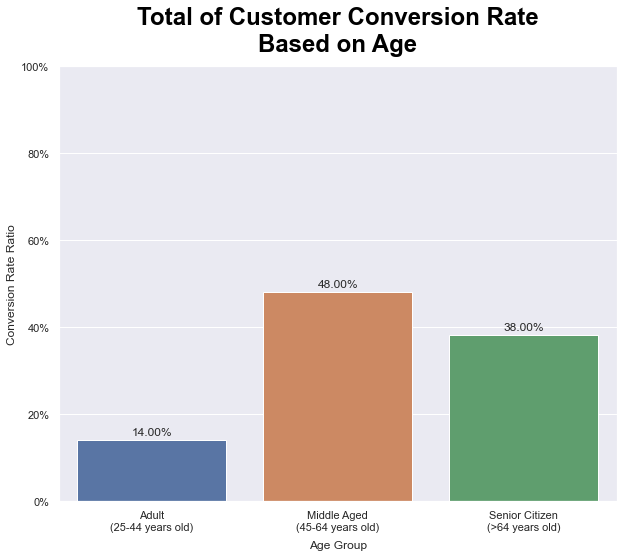

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_agecvr, x = 'AgeGroup', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Conversion Rate\nBased on Age", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Conversion Rate Ratio')
plt.xlabel('Age Group', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])
plt.savefig('age_cvr.png')

plt.show()


In [21]:
df_agetp = dfeda.groupby('AgeGroup').agg({'TotalPurchases':'sum'}).reset_index()
df_agetp['SUMTotalPurchases'] = df_agetp['TotalPurchases'].sum()
df_agetp['Percentage'] = round((df_agetp['TotalPurchases']/df_agetp['SUMTotalPurchases']), 2)
df_agetp

AgeGroup  TotalPurchases  SUMTotalPurchases  Percentage
0           Adult            3766              33291        0.11
1     Middle Aged           17936              33291        0.54
2  Senior Citizen           11589              33291        0.35

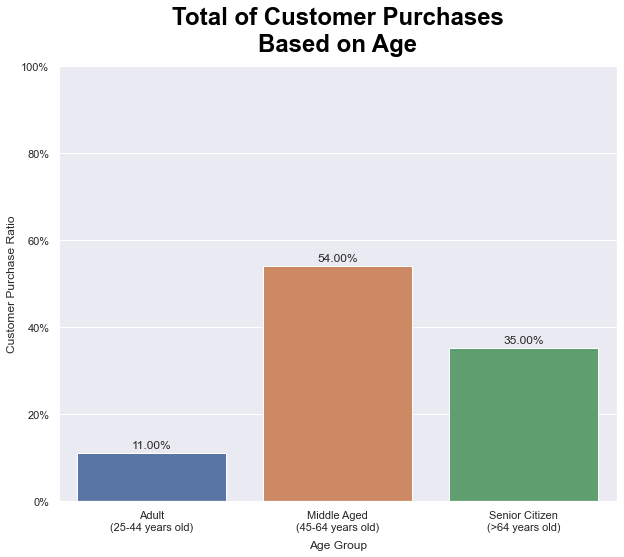

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_agetp, x = 'AgeGroup', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Purchases\nBased on Age", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Customer Purchase Ratio')
plt.xlabel('Age Group', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])


plt.show()

In [23]:
df_agets = dfeda.groupby('AgeGroup').agg({'TotalSpent':'sum'}).reset_index()
df_agets['SUMTotalSpent'] = df_agets['TotalSpent'].sum()
df_agets['Percentage'] = round((df_agets['TotalSpent']/df_agets['SUMTotalSpent']), 2)
df_agets.loc[:, "TotalSpentFormatted"] ='Rp'+ df_agets["TotalSpent"].map('{:,.0f}'.format)
df_agets

AgeGroup  TotalSpent  SUMTotalSpent  Percentage TotalSpentFormatted
0           Adult   170605000     1356988000        0.13       Rp170,605,000
1     Middle Aged   683133000     1356988000        0.50       Rp683,133,000
2  Senior Citizen   503250000     1356988000        0.37       Rp503,250,000

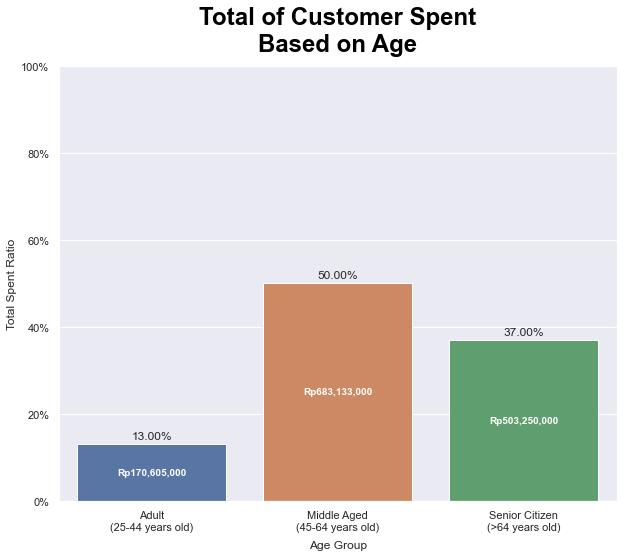

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_agets, x = 'AgeGroup', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Spent\nBased on Age", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Total Spent Ratio')
plt.xlabel('Age Group', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])
plt.bar_label(ax.containers[0], df_agets['TotalSpentFormatted'], label_type='center', color='white', weight='bold', fontsize=10)


plt.show()

## Based On Marital Status

In [25]:
df_mscvr = dfeda.groupby('Marital_Status').agg({'CVR':'sum'}).reset_index()
df_mscvr['TotalCVR'] = df_mscvr['CVR'].sum()
df_mscvr['Percentage'] = round((df_mscvr['CVR']/df_mscvr['TotalCVR']), 2)
df_mscvr.sort_values(by=['CVR'],ascending=False, inplace=True)
df_mscvr

Marital_Status          CVR     TotalCVR  Percentage
5        Menikah  3693.064016  9845.297974        0.38
0    Bertunangan  2528.656746  9845.297974        0.26
4         Lajang  2249.140705  9845.297974        0.23
1          Cerai   982.162302  9845.297974        0.10
3          Janda   386.365873  9845.297974        0.04
2           Duda     5.908333  9845.297974        0.00

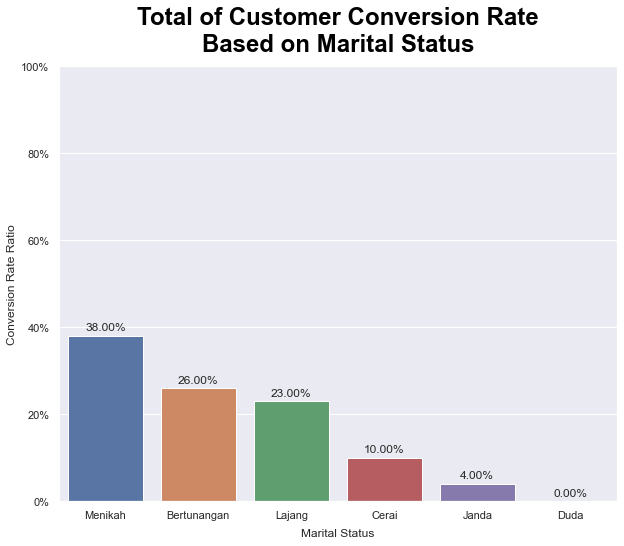

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_mscvr, x = 'Marital_Status', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Conversion Rate\nBased on Marital Status", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Conversion Rate Ratio')
plt.xlabel('Marital Status', labelpad=8)
plt.savefig('ms_cvr.png')

plt.show()


In [27]:
df_mstp = dfeda.groupby('Marital_Status').agg({'TotalPurchases':'sum'}).reset_index()
df_mstp['SUMTotalPurchases'] = df_mstp['TotalPurchases'].sum()
df_mstp['Percentage'] = round((df_mstp['TotalPurchases']/df_mstp['SUMTotalPurchases']), 2)
df_mstp.sort_values(by=['TotalPurchases'],ascending=False, inplace=True)
df_mstp

Marital_Status  TotalPurchases  SUMTotalPurchases  Percentage
5        Menikah           12922              33291        0.39
0    Bertunangan            8594              33291        0.26
4         Lajang            6914              33291        0.21
1          Cerai            3535              33291        0.11
3          Janda            1286              33291        0.04
2           Duda              40              33291        0.00

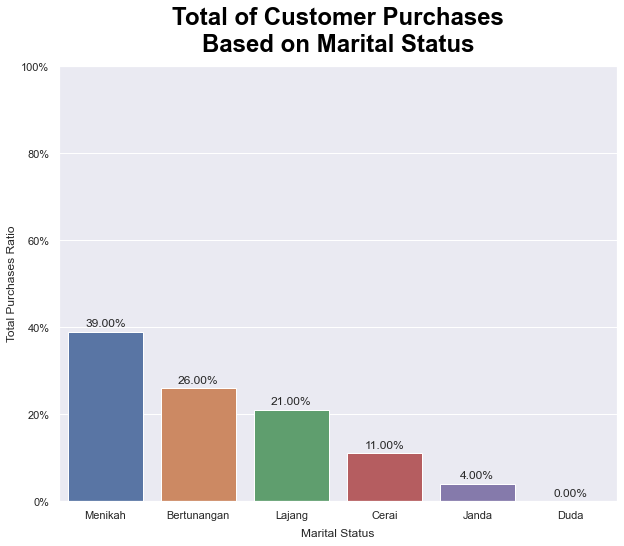

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_mstp, x = 'Marital_Status', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Purchases\nBased on Marital Status", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Total Purchases Ratio')
plt.xlabel('Marital Status', labelpad=8)


plt.show()

In [29]:
df_msts = dfeda.groupby('Marital_Status').agg({'TotalSpent':'sum'}).reset_index()
df_msts['SUMTotalSpent'] = df_msts['TotalSpent'].sum()
df_msts['Percentage'] = round((df_msts['TotalSpent']/df_msts['SUMTotalSpent']), 2)
df_msts.loc[:, "TotalSpentFormatted"] ='Rp'+ df_msts["TotalSpent"].map('{:,.0f}'.format)
df_msts.sort_values(by=['TotalSpent'],ascending=False, inplace=True)

df_msts

Marital_Status  TotalSpent  SUMTotalSpent  Percentage TotalSpentFormatted
5        Menikah   510453000     1356988000        0.38       Rp510,453,000
0    Bertunangan   352865000     1356988000        0.26       Rp352,865,000
4         Lajang   294345000     1356988000        0.22       Rp294,345,000
1          Cerai   141666000     1356988000        0.10       Rp141,666,000
3          Janda    56889000     1356988000        0.04        Rp56,889,000
2           Duda      770000     1356988000        0.00           Rp770,000

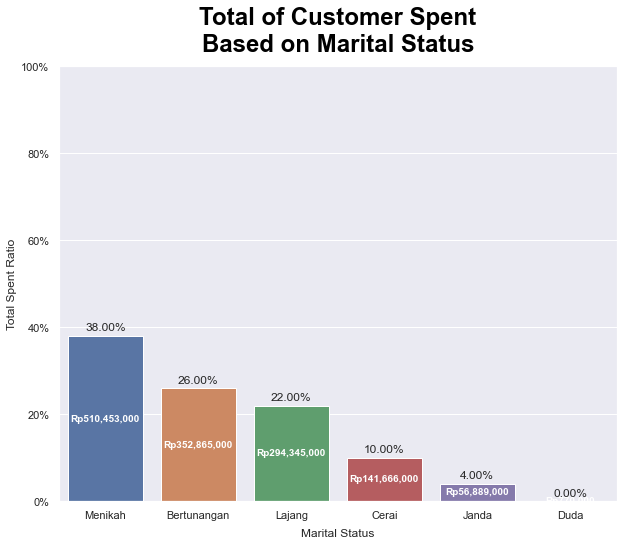

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_msts, x = 'Marital_Status', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Spent\nBased on Marital Status", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Total Spent Ratio')
plt.xlabel('Marital Status', labelpad=8)
plt.bar_label(ax.containers[0], df_msts['TotalSpentFormatted'], label_type='center', color='white', weight='bold', fontsize=10)


plt.show()

## Based on Education

In [31]:
df_ecvr = dfeda.groupby('Education').agg({'CVR':'sum'}).reset_index()
df_ecvr['TotalCVR'] = df_ecvr['CVR'].sum()
df_ecvr['Percentage'] = round((df_ecvr['CVR']/df_ecvr['TotalCVR']), 2)
df_ecvr.sort_values(by=['CVR'],ascending=False, inplace=True)
df_ecvr

Education          CVR     TotalCVR  Percentage
1        S1  5202.146409  9845.297974        0.53
3        S3  2142.395426  9845.297974        0.22
2        S2  1686.339472  9845.297974        0.17
0        D3   756.439286  9845.297974        0.08
4       SMA    57.977381  9845.297974        0.01

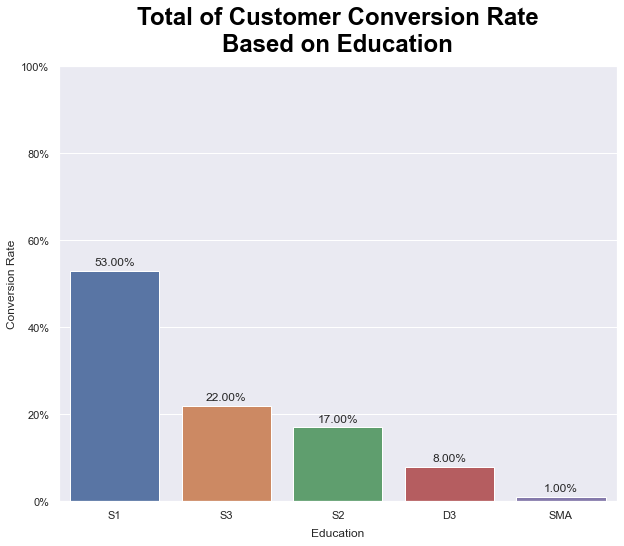

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_ecvr, x = 'Education', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Conversion Rate\nBased on Education", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Conversion Rate')
plt.xlabel('Education', labelpad=8)
plt.savefig('edu_cvr.png')

plt.show()


In [33]:
df_etp = dfeda.groupby('Education').agg({'TotalPurchases':'sum'}).reset_index()
df_etp['SUMTotalPurcahses'] = df_etp['TotalPurchases'].sum()
df_etp['Percentage'] = round((df_etp['TotalPurchases']/df_etp['SUMTotalPurcahses']), 2)
df_etp.sort_values(by=['TotalPurchases'],ascending=False, inplace=True)
df_etp

Education  TotalPurchases  SUMTotalPurcahses  Percentage
1        S1           16894              33291        0.51
3        S3            7693              33291        0.23
2        S2            5523              33291        0.17
0        D3            2802              33291        0.08
4       SMA             379              33291        0.01

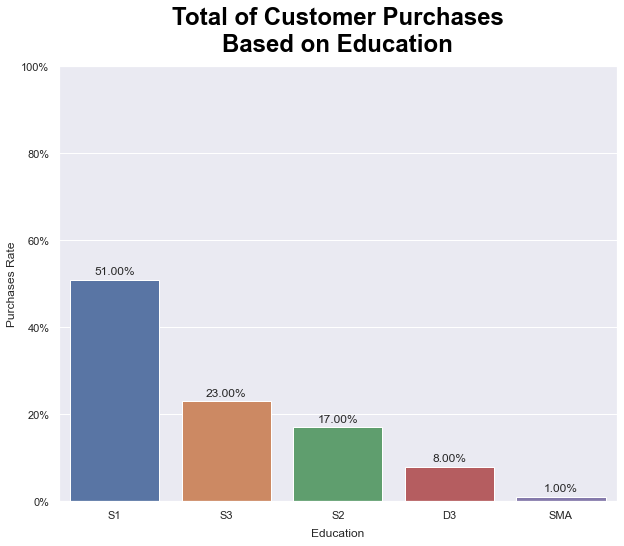

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_etp, x = 'Education', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Purchases\nBased on Education", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Purchases Rate')
plt.xlabel('Education', labelpad=8)


plt.show()

In [35]:
df_ets = dfeda.groupby('Education').agg({'TotalSpent':'sum'}).reset_index()
df_ets['SUMTotalSpent'] = df_ets['TotalSpent'].sum()
df_ets['Percentage'] = round((df_ets['TotalSpent']/df_ets['SUMTotalSpent']), 2)
df_ets.loc[:, "TotalSpentFormatted"] ='Rp'+ df_ets["TotalSpent"].map('{:,.0f}'.format)
df_ets.sort_values(by=['TotalSpent'],ascending=False, inplace=True)

df_ets

Education  TotalSpent  SUMTotalSpent  Percentage TotalSpentFormatted
1        S1   698626000     1356988000        0.51       Rp698,626,000
3        S3   326791000     1356988000        0.24       Rp326,791,000
2        S2   226359000     1356988000        0.17       Rp226,359,000
0        D3   100795000     1356988000        0.07       Rp100,795,000
4       SMA     4417000     1356988000        0.00         Rp4,417,000

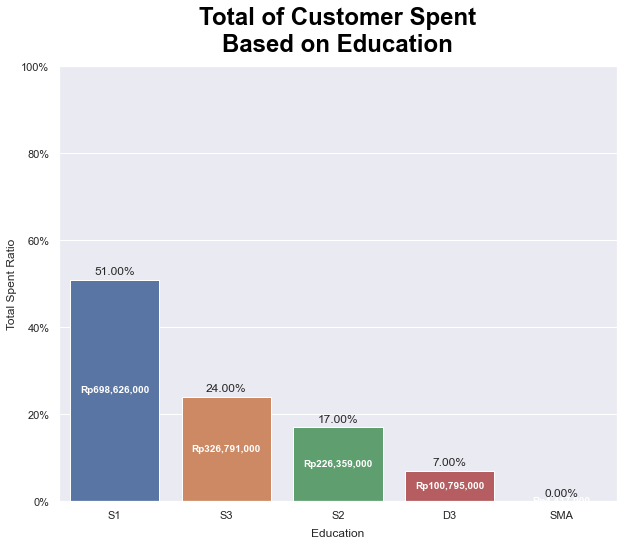

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.barplot(data = df_ets, x = 'Education', y = 'Percentage')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)


for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

plt.title("Total of Customer Spent\nBased on Education", fontsize=24, color='black', weight='bold', pad=15)
plt.ylabel('Total Spent Ratio')
plt.xlabel('Education', labelpad=8)
plt.bar_label(ax.containers[0], df_ets['TotalSpentFormatted'], label_type='center', color='white', weight='bold', fontsize=10)


plt.show()

# Data Cleaning

## Data Missing

In [37]:
dfclean = dfeda.copy()

In [38]:
dfclean.isna().sum()

ID                      0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
TotalPurchases          0
CVR                     0
Age                     0
AgeGroup                0
NumChild                0
TotalSpent              0
TotalAcceptedCmp        0
CustDayJoined           0
dtype: int64

Terdapat 24 missing data pada feature income

In [39]:
dfclean['Income'].isna().sum()*100/len(dfclean['Income'])

1.0714285714285714

In [40]:
# Terdapat 1% data Income yang hilang. Karena berdasarkan EDA, feature Income memilik distribusi yang tidak normal (bimodal), maka missing value akan diisi dengan median.

dfclean['Income'] = dfclean['Income'].fillna(dfclean['Income'].median())

## Data Duplicated

In [41]:
dfclean.duplicated(subset='ID').sum()

0

Semua ID bersifat unik, tidak ada duplicated data pada data ini.

In [42]:
# drop features lain yang tidak diperlukan untuk tahap selanjutnya

dfclean.drop(['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome', 'Response'], inplace=True, axis=1)

In [43]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   NumWebVisitsMonth  2240 non-null   int64  
 5   Complain           2240 non-null   object 
 6   TotalPurchases     2240 non-null   int64  
 7   CVR                2240 non-null   float64
 8   Age                2240 non-null   int64  
 9   AgeGroup           2240 non-null   object 
 10  NumChild           2240 non-null   object 
 11  TotalSpent         2240 non-null   int64  
 12  TotalAcceptedCmp   2240 non-null   int64  
 13  CustDayJoined      2240 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 245.1+ KB


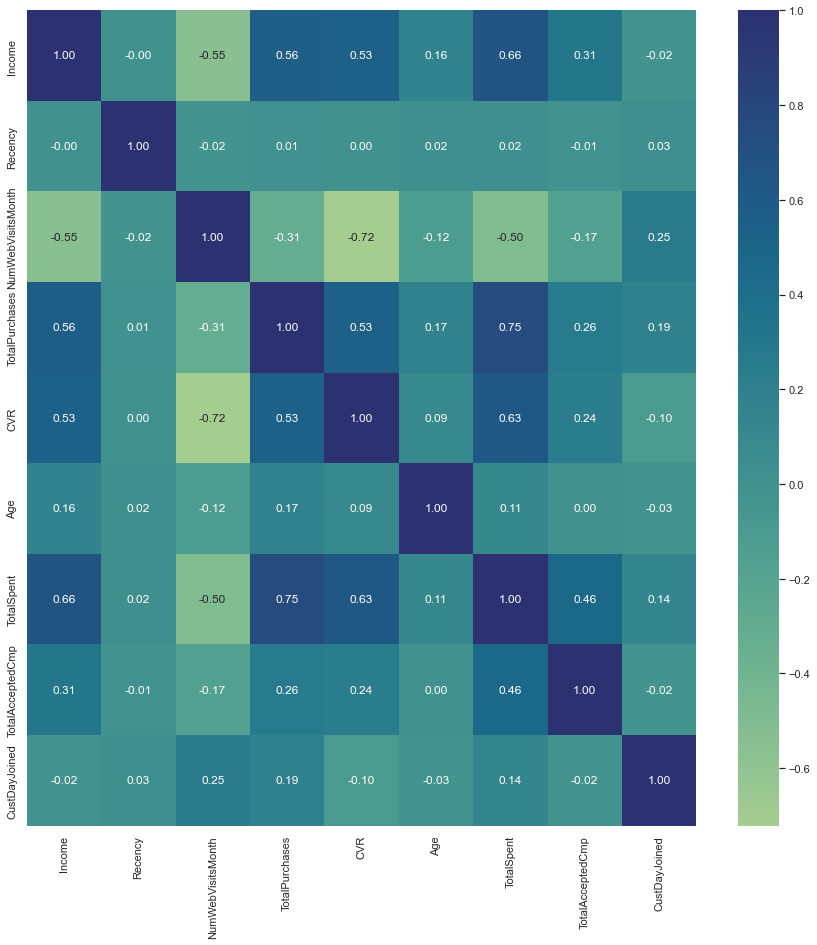

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(dfclean.corr(), cmap='crest', annot=True, fmt='.2f')
plt.show()

<Figure size 1080x1080 with 0 Axes>

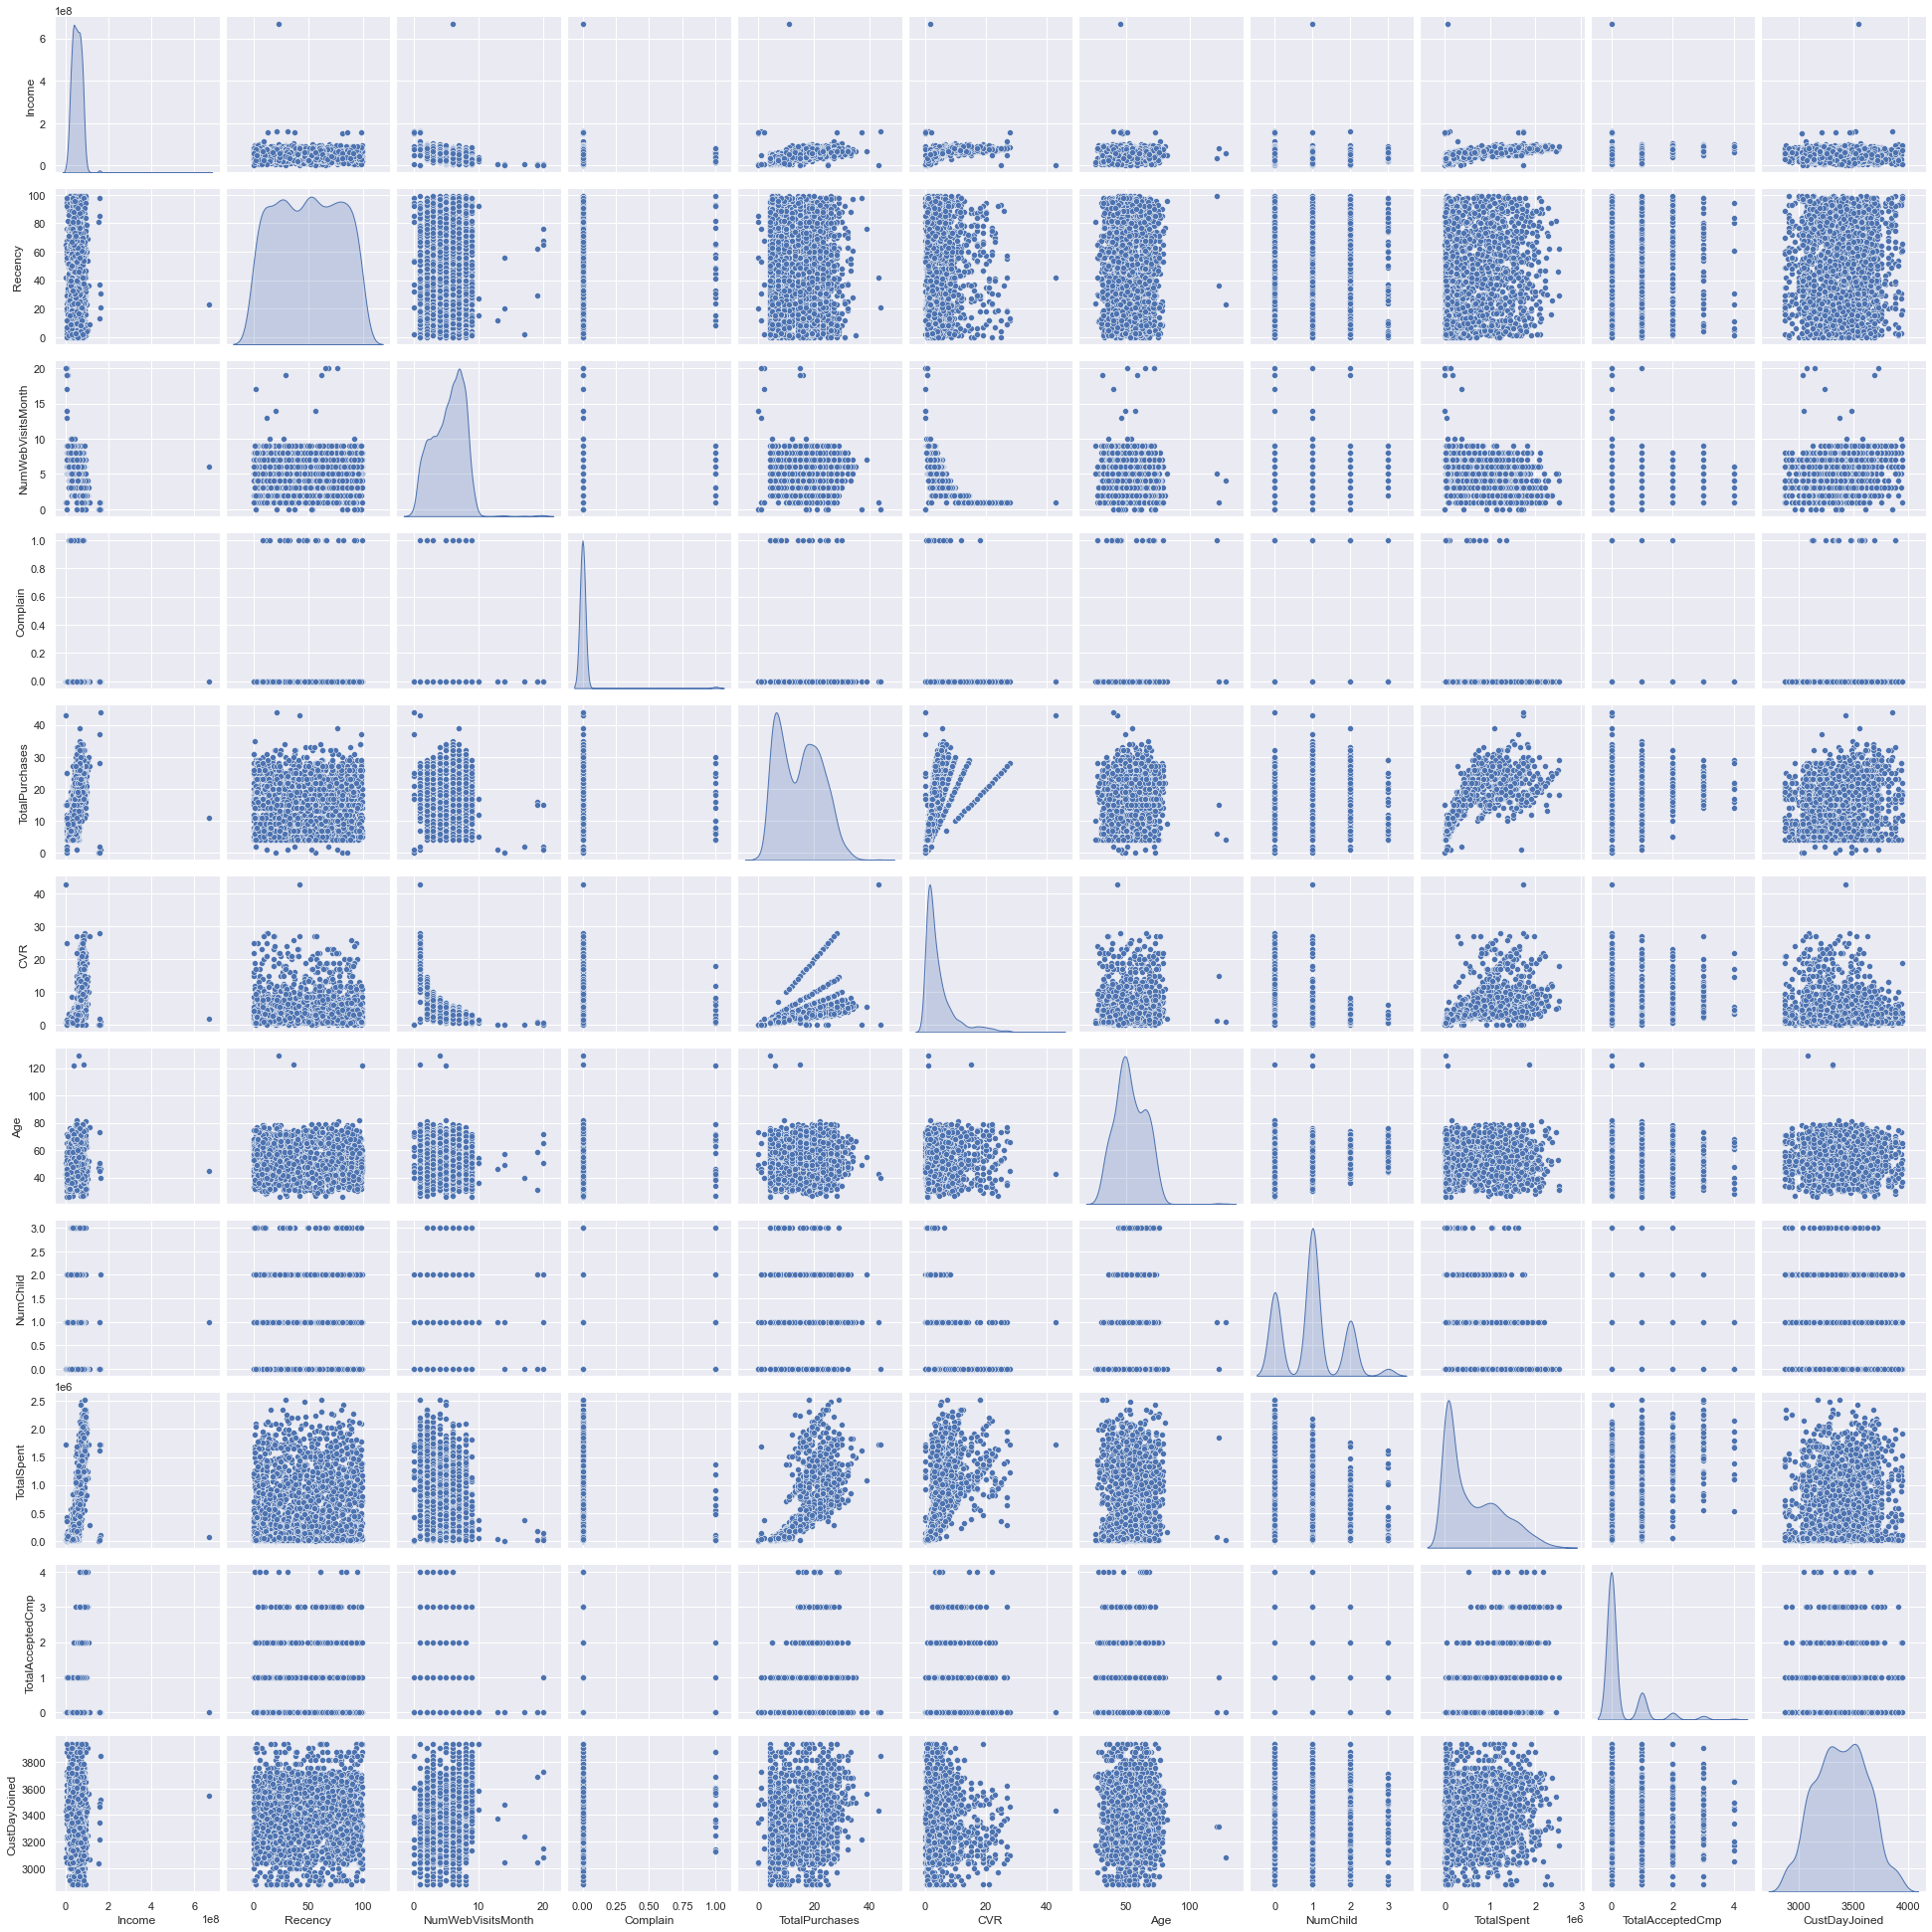

In [45]:
plt.figure(figsize=(15, 15))
sns.pairplot(dfclean, diag_kind='kde')
plt.show()

# Feature Standardization

In [46]:
cat_col=[]
num_col=[]

cat_num (dfclean)

In [47]:
dfclean.describe().T

count          mean           std        min  \
Income             2240.0  5.223798e+07  2.503796e+07  1730000.0   
Recency            2240.0  4.910938e+01  2.896245e+01        0.0   
NumWebVisitsMonth  2240.0  5.316518e+00  2.426645e+00        0.0   
TotalPurchases     2240.0  1.486205e+01  7.677173e+00        0.0   
CVR                2240.0  4.395222e+00  4.913624e+00        0.0   
Age                2240.0  5.319420e+01  1.198407e+01       26.0   
TotalSpent         2240.0  6.057982e+05  6.022493e+05     5000.0   
TotalAcceptedCmp   2240.0  2.977679e-01  6.783808e-01        0.0   
CustDayJoined      2240.0  3.389043e+03  2.322299e+02     2877.0   

                            25%         50%          75%          max  
Income             3.553875e+07  51381500.0  68289750.00  666666000.0  
Recency            2.400000e+01        49.0        74.00         99.0  
NumWebVisitsMonth  3.000000e+00         6.0         7.00         20.0  
TotalPurchases     8.000000e+00        15.0        21.00         44.0  
CVR                1.222222e+00         2.6         5.35         43.0  
Age                4.500000e+01        52.0        63.00        129.0  
TotalSpent         6.875000e+04    396000.0   1045500.00    2525000.0  
TotalAcceptedCmp   0.000000e+00         0.0         0.00          4.0  
CustDayJoined      3.217750e+03      3390.0      3562.25       3940.0

In [48]:
dfclean.describe(include='O').T

count unique          top  freq
Education       2240      5           S1  1127
Marital_Status  2240      6      Menikah   864
Complain        2240      2            0  2219
AgeGroup        2240      3  Middle Aged  1240
NumChild        2240      4            1  1128

In [49]:
for col in num_col:
  dfclean[col + '_STD'] = StandardScaler().fit_transform(dfclean[col].values.reshape(len(dfclean), 1))

In [50]:
dfclean.describe().T

count          mean           std           min  \
Income                 2240.0  5.223798e+07  2.503796e+07  1.730000e+06   
Recency                2240.0  4.910938e+01  2.896245e+01  0.000000e+00   
NumWebVisitsMonth      2240.0  5.316518e+00  2.426645e+00  0.000000e+00   
TotalPurchases         2240.0  1.486205e+01  7.677173e+00  0.000000e+00   
CVR                    2240.0  4.395222e+00  4.913624e+00  0.000000e+00   
Age                    2240.0  5.319420e+01  1.198407e+01  2.600000e+01   
TotalSpent             2240.0  6.057982e+05  6.022493e+05  5.000000e+03   
TotalAcceptedCmp       2240.0  2.977679e-01  6.783808e-01  0.000000e+00   
CustDayJoined          2240.0  3.389043e+03  2.322299e+02  2.877000e+03   
Income_STD             2240.0 -1.253570e-16  1.000223e+00 -2.017707e+00   
Recency_STD            2240.0  2.277444e-17  1.000223e+00 -1.696001e+00   
NumWebVisitsMonth_STD  2240.0 -4.158380e-17  1.000223e+00 -2.191381e+00   
TotalPurchases_STD     2240.0 -1.685160e-17  1.000223e+00 -1.936308e+00   
CVR_STD                2240.0 -1.229671e-16  1.000223e+00 -8.946968e-01   
Age_STD                2240.0 -1.741662e-16  1.000223e+00 -2.269702e+00   
TotalSpent_STD         2240.0 -4.530106e-17  1.000223e+00 -9.978133e-01   
TotalAcceptedCmp_STD   2240.0 -1.463611e-16  1.000223e+00 -4.390371e-01   
CustDayJoined_STD      2240.0 -2.294791e-16  1.000223e+00 -2.205391e+00   

                                25%           50%           75%           max  
Income                 3.553875e+07  5.138150e+07  6.828975e+07  6.666660e+08  
Recency                2.400000e+01  4.900000e+01  7.400000e+01  9.900000e+01  
NumWebVisitsMonth      3.000000e+00  6.000000e+00  7.000000e+00  2.000000e+01  
TotalPurchases         8.000000e+00  1.500000e+01  2.100000e+01  4.400000e+01  
CVR                    1.222222e+00  2.600000e+00  5.350000e+00  4.300000e+01  
Age                    4.500000e+01  5.200000e+01  6.300000e+01  1.290000e+02  
TotalSpent             6.875000e+04  3.960000e+05  1.045500e+06  2.525000e+06  
TotalAcceptedCmp       0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
CustDayJoined          3.217750e+03  3.390000e+03  3.562250e+03  3.940000e+03  
Income_STD            -6.671053e-01 -3.421472e-02  6.412408e-01  2.454534e+01  
Recency_STD           -8.671566e-01 -3.777284e-03  8.596020e-01  1.722981e+00  
NumWebVisitsMonth_STD -9.548307e-01  2.817201e-01  6.939037e-01  6.052291e+00  
TotalPurchases_STD    -8.940252e-01  1.797240e-02  7.996846e-01  3.796248e+00  
CVR_STD               -6.458998e-01 -3.654376e-01  1.943557e-01  7.858436e+00  
Age_STD               -6.839101e-01 -9.967091e-02  8.184192e-01  6.326960e+00  
TotalSpent_STD        -8.919365e-01 -3.484355e-01  7.302623e-01  3.187435e+00  
TotalAcceptedCmp_STD  -4.390371e-01 -4.390371e-01 -4.390371e-01  5.458673e+00  
CustDayJoined_STD     -7.377670e-01  4.120529e-03  7.460081e-01  2.372992e+00

<Figure size 1080x1080 with 0 Axes>

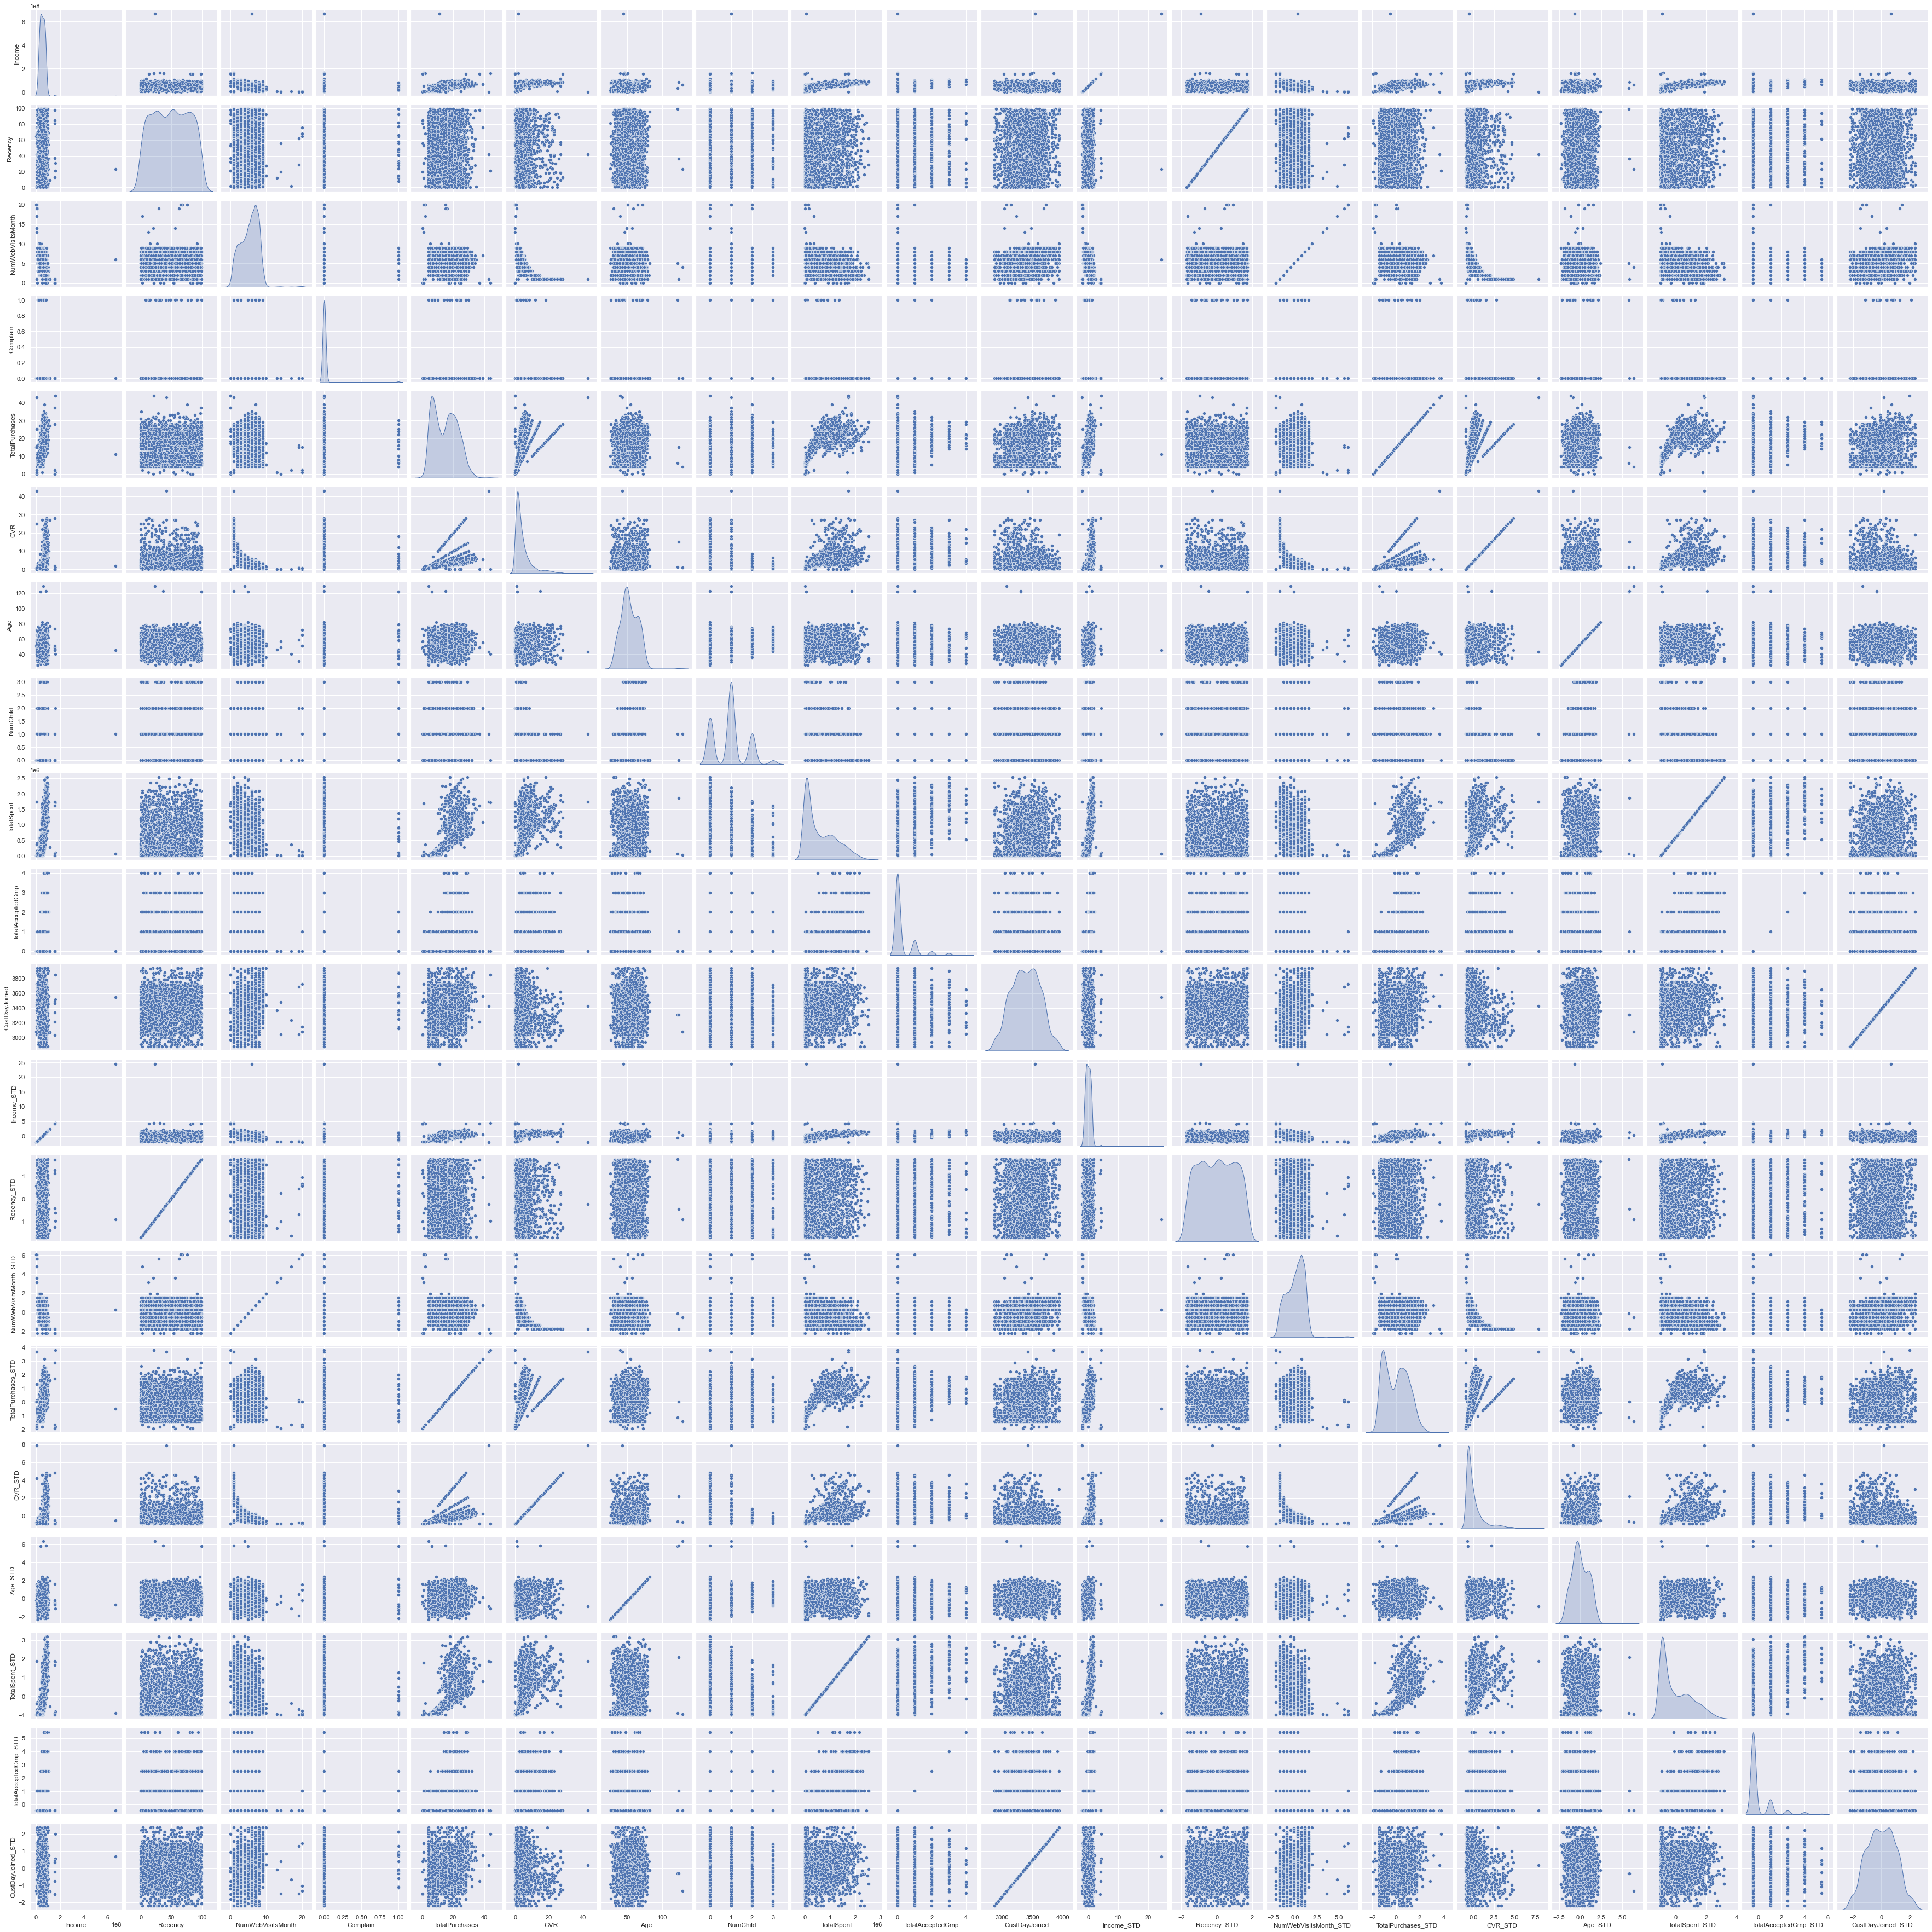

In [51]:
plt.figure(figsize=(15, 15))
sns.pairplot(dfclean, diag_kind='kde')
plt.show()

In [52]:
dfclean.head()

Education Marital_Status      Income  Recency  NumWebVisitsMonth Complain  \
0        S1         Lajang  58138000.0       58                  7        0   
1        S1         Lajang  46344000.0       38                  5        0   
2        S1    Bertunangan  71613000.0       26                  4        0   
3        S1    Bertunangan  26646000.0       26                  6        0   
4        S3        Menikah  58293000.0       94                  5        0   

   TotalPurchases       CVR  Age        AgeGroup  ... CustDayJoined  \
0              25  3.571429   65  Senior Citizen  ...          3848   
1               6  1.200000   68  Senior Citizen  ...          3002   
2              21  5.250000   57     Middle Aged  ...          3349   
3               8  1.333333   38           Adult  ...          2942   
4              19  3.800000   41     Middle Aged  ...          3198   

   Income_STD  Recency_STD  NumWebVisitsMonth_STD  TotalPurchases_STD  \
0    0.235696     0.307039               0.693904            1.320826   
1   -0.235454    -0.383664              -0.130463           -1.154596   
2    0.773999    -0.798086              -0.542647            0.799685   
3   -1.022355    -0.798086               0.281720           -0.894025   
4    0.241888     1.550305              -0.130463            0.539114   

    CVR_STD   Age_STD  TotalSpent_STD  TotalAcceptedCmp_STD  CustDayJoined_STD  
0 -0.167692  0.985345        1.679417             -0.439037           1.976745  
1 -0.650423  1.235733       -0.961275             -0.439037          -1.667011  
2  0.174000  0.317643        0.282673             -0.439037          -0.172468  
3 -0.623282 -1.268149       -0.918094             -0.439037          -1.925433  
4 -0.121164 -1.017761       -0.305254             -0.439037          -0.822831  

[5 rows x 23 columns]

Features yang akan digunakan untuk tahap selanjutnya dipilih dengan metode RFM + LC :

- R/Recency -> kolom Recency:
Jumlah hari sejak hari terakhir customer membeli

- F/Frequency -> TotalPurchases:
Jumlah pembelian yang dilakukan

- M/Monetary -> TotalSpent:
Jumlah total uang yang dikeluarkan oleh customer

- L/Loyalitas -> kolom CustDayJoined: 
Jumlah hari sejak customer mendaftar/membeli untuk pertama kali

- C/Pilihan -> kolom TotalAcceptedCmp:
Jumlah campaign yang diterima oleh customer

Features tersebut akan digunakan dalam proses clustering

In [53]:
# dfselect = dfclean[['Recency_STD','TotalPurchases_STD','TotalSpent_STD','CustDayJoined_STD','TotalAcceptedCmp_STD']]
dfselect = dfclean[['Recency','TotalPurchases','TotalSpent_STD','CustDayJoined','TotalAcceptedCmp']]
dfselect.columns = ['R', 'F', 'M', 'L', 'C']
dfselect.head()

R   F         M     L  C
0  58  25  1.679417  3848  0
1  38   6 -0.961275  3002  0
2  26  21  0.282673  3349  0
3  26   8 -0.918094  2942  0
4  94  19 -0.305254  3198  0

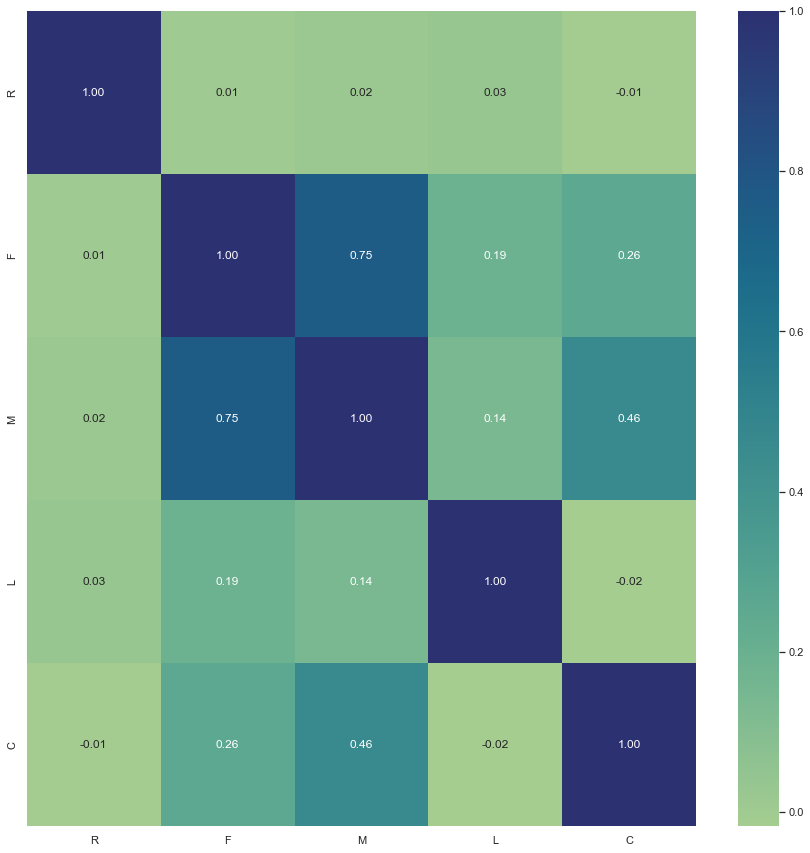

In [54]:
plt.figure(figsize=(15, 15))
sns.heatmap(dfselect.corr(), cmap='crest', annot=True, fmt='.2f')
plt.show()

# Clustering

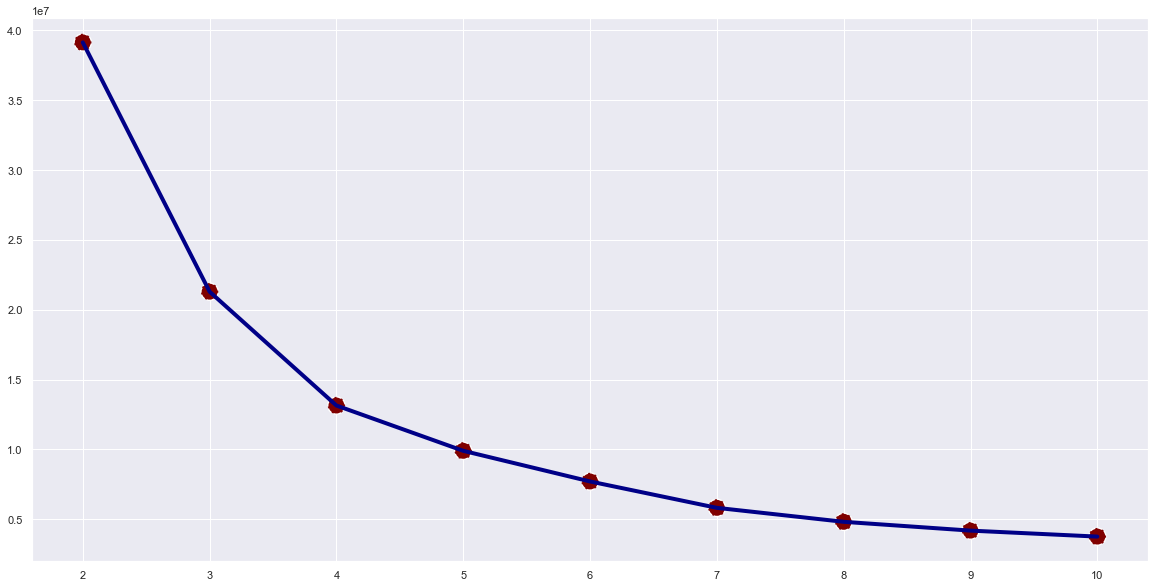

In [55]:
# Inertia

inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dfselect)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [56]:
pd.Series(inertia) - pd.Series(inertia).shift(1)

0             NaN
1   -1.784305e+07
2   -8.147633e+06
3   -3.241435e+06
4   -2.194278e+06
5   -1.887656e+06
6   -1.000436e+06
7   -6.293485e+05
8   -4.277373e+05
dtype: float64

In [57]:
# Silhoutte Score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(dfselect)
    preds = kmeans.predict(dfselect)
     
    score_euclidean = silhouette_score(dfselect, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)


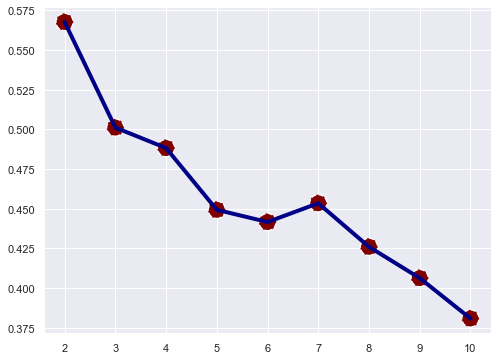

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Berdasarkan evaluasi menggunakan Silhouette Score, diperoleh informasi jumlah cluster yang ideal adalah 2 cluster. Namun karena 2 cluster kurang baik, maka dipilih 3 cluster sebagai cluster yang digunakan pada data ini.

In [59]:
# membuat cluster
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfselect)
clusters = kmeans.labels_
dfclean['clusters'] = clusters

dfclean.sample(5)

Education Marital_Status      Income  Recency  NumWebVisitsMonth  \
62          S1         Lajang  61823000.0       26                  7   
268         S1        Menikah  72940000.0       13                  1   
876         S2          Cerai  42835000.0       64                  6   
1468        S3        Menikah  41145000.0       20                  3   
227         S1          Cerai  51537000.0       27                  8   

     Complain  TotalPurchases        CVR  Age        AgeGroup  ... Income_STD  \
62          0              24   3.428571   70  Senior Citizen  ...   0.382905   
268         0              13  13.000000   52     Middle Aged  ...   0.827010   
876         0              23   3.833333   51     Middle Aged  ...  -0.375633   
1468        0               4   1.333333   72  Senior Citizen  ...  -0.443145   
227         0              18   2.250000   70  Senior Citizen  ...  -0.028003   

      Recency_STD  NumWebVisitsMonth_STD  TotalPurchases_STD   CVR_STD  \
62      -0.798086               0.693904            1.190541 -0.196773   
268     -1.247043              -1.779198           -0.242598  1.751599   
876      0.514250               0.281720            1.060255 -0.114379   
1468    -1.005297              -0.954831           -1.415167 -0.623282   
227     -0.763551               1.106087            0.408829 -0.436684   

       Age_STD  TotalSpent_STD  TotalAcceptedCmp_STD  CustDayJoined_STD  \
62    1.402658        0.462041             -0.439037           0.620027   
268  -0.099671        0.623140             -0.439037           0.098875   
876  -0.183134       -0.017934             -0.439037           0.051498   
1468  1.569584       -0.984527             -0.439037          -1.662704   
227   1.402658        0.825759             -0.439037           1.304846   

      clusters  
62           1  
268          2  
876          2  
1468         0  
227          1  

[5 rows x 24 columns]

In [61]:
# analisis cluster

pca = PCA(n_components=2)

pca.fit(dfselect)
pcs = pca.transform(dfselect)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

PC 1       PC 2
0  459.043156   7.137358
1 -387.131693  -9.630380
2  -40.091541 -22.956103
3 -447.163238 -21.401027
4 -190.840535  45.620173

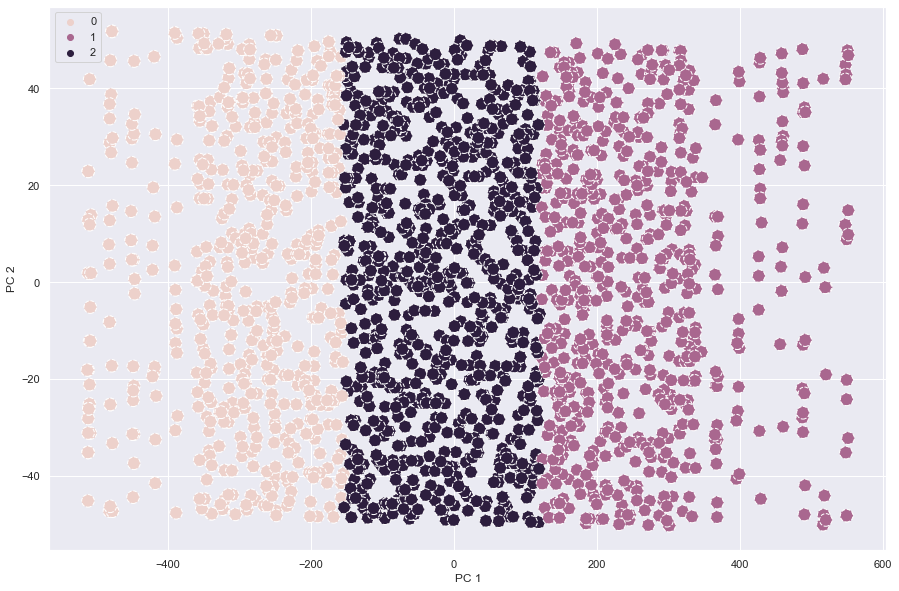

In [82]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue=clusters,
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)


plt.show()

In [88]:
df_cluster1 = dfclean[['Recency','TotalPurchases','TotalSpent','CustDayJoined','TotalAcceptedCmp','clusters']].groupby('clusters').median()
df_cluster1.loc[:, "TotalSpentFormatted"] ='Rp'+ df_cluster1["TotalSpent"].map('{:,.0f}'.format)
df_cluster1.drop(columns=['TotalSpent'], inplace=True)
df_cluster1.columns = ['AVGRecency', 'AVGPurchases','AVGCustDayJoin', 'AVGAccCmp', 'AVGTotalSpent']
df_cluster1

AVGRecency  AVGPurchases  AVGCustDayJoin  AVGAccCmp AVGTotalSpent
clusters                                                                   
0               47.0          11.0          3109.0        0.0     Rp182,000
1               49.0          17.0          3630.0        0.0     Rp570,000
2               51.0          15.0          3369.0        0.0     Rp382,000

In [80]:
df_cluster2 = dfclean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})
df_cluster2.sort_values(by=['clusters'],ascending=True, inplace=True)
df_cluster2.reset_index(drop=True, inplace=True)
df_cluster2

clusters  total_members
0         0            610
1         1            743
2         2            887

- Cluster 0 (low value customer)
- Cluster 1 (high value customer)
- Cluster 2 (medium value customers)